In [277]:
import os, cv2, re, random
import numpy as np
import pandas as pd
import tensorflow as tf
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [278]:
# Get GPU status
# 获取GPU状态
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [279]:
# Traversing the dataset folder
# 遍历数据集文件夹
for dirname, _, filenames in os.walk('./Kaggel_dataset'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [280]:
# Read the training set and generate the image generator
# 读取训练集，生成图片生成器
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('./Kaggel_dataset/training_set', target_size = (64, 64), batch_size = 32, classes=['cats', 'dogs'])

Found 8005 images belonging to 2 classes.


In [281]:
# Read the testing set and generate the image generator
# 读取测试集，生成图片生成器
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('./Kaggel_dataset/test_set', target_size = (64, 64), batch_size = 32, classes=['cats', 'dogs'])

Found 2023 images belonging to 2 classes.


In [282]:
# Build the model
# 建立模型
model = Sequential()

# Add 1st Convolutional layer
# 增加第一个卷积层
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), input_shape=(224, 224, 3), activation='relu'))
# Batch Normalization
# 批量标准化
model.add(tf.keras.layers.BatchNormalization())
# Add 2nd Convolutional layer
# 添加第二个卷积层
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), input_shape=(224, 224, 3), activation='relu'))
# Batch Normalization
# 批量标准化
model.add(tf.keras.layers.BatchNormalization())
# Add pooling layer
# 添加池化层
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'))
# Add 2nd Convolutional layer
# 添加第二个卷积层
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
# Batch Normalization
# 批量标准化
model.add(tf.keras.layers.BatchNormalization())
# Add 3rd Convolutional layer
# 添加第三个卷积层
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
# Batch Normalization
# 批量标准化
model.add(tf.keras.layers.BatchNormalization())
# Add pooling layer
# 添加池化层
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'))


# Add pooling layer
# 添加池化层
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'))
# Add 2nd Convolutional layer
# 添加第二个卷积层
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
# Add pooling layer
# 添加池化层
model.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2), padding='same'))
# Flattening
# 压平数据
model.add(tf.keras.layers.Flatten())
# Full connection
# 全连接层
model.add(tf.keras.layers.Dense(128, activation='relu'))
# Output layer
# 输出层
model.add(tf.keras.layers.Dense(2, activation='sigmoid'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [283]:
# Using callbacks for avoiding overfitting
# 防止过拟合
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(patience=5, 
                               min_delta=0.001,
                               restore_best_weights=True)

In [284]:
# Model training
# 训练模型
history = model.fit(x = training_set, validation_data = test_set, epochs = 15, callbacks=[early_stopping])

Epoch 1/15
251/251 [==============================] - 25s 99ms/step - loss: 0.6856 - accuracy: 0.5656 - val_loss: 0.6551 - val_accuracy: 0.6303
Epoch 2/15
251/251 [==============================] - 24s 97ms/step - loss: 0.6418 - accuracy: 0.6345 - val_loss: 0.6193 - val_accuracy: 0.6851
Epoch 3/15
251/251 [==============================] - 25s 99ms/step - loss: 0.6050 - accuracy: 0.6762 - val_loss: 0.5923 - val_accuracy: 0.6856
Epoch 4/15
251/251 [==============================] - 24s 97ms/step - loss: 0.5683 - accuracy: 0.7053 - val_loss: 0.5486 - val_accuracy: 0.7296
Epoch 5/15
251/251 [==============================] - 25s 98ms/step - loss: 0.5330 - accuracy: 0.7337 - val_loss: 0.5570 - val_accuracy: 0.7222
Epoch 6/15
251/251 [==============================] - 25s 99ms/step - loss: 0.5123 - accuracy: 0.7412 - val_loss: 0.5154 - val_accuracy: 0.7499
Epoch 7/15
251/251 [==============================] - 25s 98ms/step - loss: 0.4794 - accuracy: 0.7665 - val_loss: 0.5212 - val_accuracy:

KeyboardInterrupt: 

In [ ]:
# Store the models
# 储存模型
model.save_weights('./model.h5')

Text(0.5, 1.0, 'Accuracy Evolution')

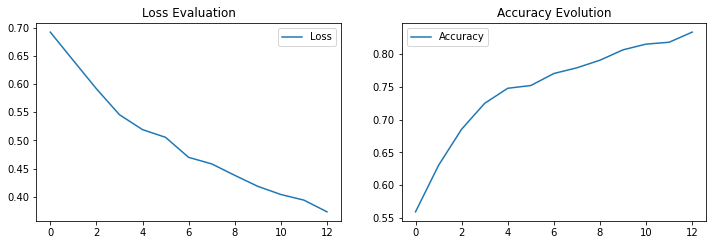

In [ ]:
# CNN model Performance with the help of graphs
# 通过图像确认模型表现
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.plot(history.history['loss'], label='Loss')
# plt.plot(r.history['val_loss'],label='Val_Loss')
plt.legend()
plt.title('Loss Evaluation')

plt.subplot(2,2,2)
plt.plot(history.history['accuracy'], label='Accuracy')
# plt.plot(r.history['val_accuracy'],label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:
# Test model
# 测试模型
test_imgs, test_labels = next(test_set)

In [ ]:
# Get some photoes(500+) to test
# 获取测试图像
for i in range(20):
    test_imgs_i, test_labels_i = next(test_set)
    test_imgs = np.concatenate((test_imgs, test_imgs_i),axis=0)
    test_labels = np.concatenate((test_labels, test_labels_i),axis=0)

In [ ]:
# Load the model
# 加载模型
model.load_weights('./model.h5')

In [ ]:
# Get predictions
# 获取预测值
pred = np.round(model.predict(x=test_imgs, verbose=0))

In [ ]:
# Get test results
# 得到测试结果
from sklearn import metrics
metrics.classification_report(test_labels, pred)

E:\Anaconda\envs\da_py37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.72      0.91      0.80       330\n           1       0.71      0.90      0.80       342\n\n   micro avg       0.71      0.91      0.80       672\n   macro avg       0.71      0.91      0.80       672\nweighted avg       0.71      0.91      0.80       672\n samples avg       0.77      0.91      0.82       672\n'